In [1]:
import pandas as pd 
import numpy as np 
import re

In [2]:
df=pd.read_csv('amazonreviews.tsv',sep='\t')

In [3]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
df.shape

(10000, 2)

In [5]:
# checking duplicates in the data
df.duplicated().sum()

0

In [6]:
# preprocessing text before converting them into embeddings
from nltk.corpus import stopwords
stopwords=stopwords.words('English')
def clean_text(text):
    text=text.lower()
    text=re.sub(r"[^a-zA-Z0-9\s]","",text)
    text=text.strip()
    
    words=text.split()
    words=[w for w in words if w not in stopwords]
    text=" ".join(words)
    
    return text

In [7]:
df['cleaned_review']=df['review'].apply(clean_text)

In [8]:
df.head()

,label,review,cleaned_review
0,pos,Stuning even for the non-gamer: This sound tra...,stuning even nongamer sound track beautiful pa...
1,pos,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anything im reading lot r...
2,pos,Amazing!: This soundtrack is my favorite music...,amazing soundtrack favorite music time hands i...
3,pos,Excellent Soundtrack: I truly like this soundt...,excellent soundtrack truly like soundtrack enj...
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing youve played g...


In [9]:
text_for_visualization=[]
for text in df['cleaned_review']:
    text_for_visualization.append(text)

In [10]:
combined_text=''.join(text_for_visualization)

In [11]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt 
import seaborn as sns 

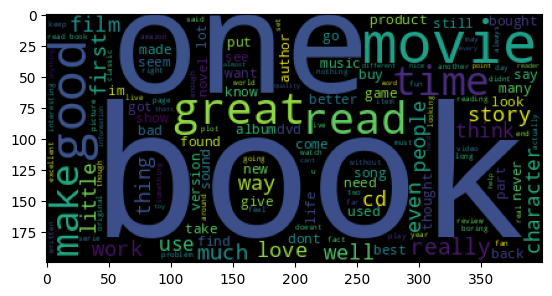

In [12]:
wc=WordCloud().generate(combined_text)
plt.imshow(wc)
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

In [14]:
df['label']=df['label'].map({'pos':1,'neg':0})

In [15]:
df['label'].value_counts()

label
0    5097
1    4903
Name: count, dtype: int64

In [16]:
X=df['cleaned_review']

In [17]:
y=df['label']

In [18]:
tfidf=TfidfVectorizer(max_features=5000)

In [19]:
X_transformed=tfidf.fit_transform(X)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_transformed,y,test_size=0.2,random_state=42)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 5000), (2000, 5000), (8000,), (2000,))

In [22]:
lr=LogisticRegression()

In [23]:
lr.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred=lr.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score,classification_report

In [26]:
lr_accuracy=round(accuracy_score(y_test,y_pred),2)
print("Accuracy Score:",round(accuracy_score(y_test,y_pred),2))

Accuracy Score: 0.84


In [27]:
report=classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.853944,0.845709,0.849806,1037.000
1,0.835560,0.844237,0.839876,963.000
accuracy,0.845000,0.845000,0.845000,0.845
macro avg,0.844752,0.844973,0.844841,2000.000
weighted avg,0.845092,0.845000,0.845025,2000.000


In [28]:
svc=SVC(kernel='linear')

In [29]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [30]:
y_pred1=svc.predict(X_test)

In [31]:
svc_accuracy=round(accuracy_score(y_test,y_pred1),2)
print("Accuracy Score:",round(accuracy_score(y_test,y_pred1),2))

Accuracy Score: 0.85


In [32]:
report=classification_report(y_test,y_pred1,output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.855212,0.854388,0.854800,1037.0000
1,0.843361,0.844237,0.843799,963.0000
accuracy,0.849500,0.849500,0.849500,0.8495
macro avg,0.849287,0.849312,0.849299,2000.0000
weighted avg,0.849506,0.849500,0.849503,2000.0000


In [33]:
data={'Algorithm':['Logistic Regression','Support Vector Classifier'],
'Accuracy Score':[lr_accuracy,svc_accuracy]}

pd.DataFrame(data).set_index('Algorithm')

,Accuracy Score
Algorithm,
Logistic Regression,0.84
Support Vector Classifier,0.85


# Generating Advanance Embeddings

In [34]:
from nltk.tokenize import word_tokenize
import gensim

In [49]:
tokens=[]
for text in df['cleaned_review']:
    tokens.append(word_tokenize(text))

In [52]:
from gensim.models import Word2Vec

In [53]:
model=Word2Vec(window=10,vector_size=100,min_count=2)

In [54]:
model.build_vocab(tokens)

In [61]:
model.train(tokens,total_examples=model.corpus_count,epochs=10)

(3704461, 4117890)

In [67]:
model.wv.most_similar('story')

[('characters', 0.9154968857765198),
 ('ending', 0.8614040613174438),
 ('suspense', 0.853141188621521),
 ('character', 0.8498194813728333),
 ('romance', 0.8477199673652649),
 ('novel', 0.8389585614204407),
 ('plot', 0.835371732711792),
 ('humor', 0.8349124193191528),
 ('storyline', 0.8284125328063965),
 ('stories', 0.8267972469329834)]